In [1]:
# Download libraries
pip install pandas seaborn nltk scikit-learn joblib matplotlib


# Download NLTK data
nltk.download('stopwords')
nltk.download('punkt')

SyntaxError: invalid syntax (2371611373.py, line 2)

In [2]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import nltk  # For text preprocessing (Natural Language Toolkit)
from nltk.corpus import stopwords  # To remove stopwords
from nltk.tokenize import word_tokenize  # To tokenize sentences into words
from nltk.stem import PorterStemmer  # To reduce words to their root form
import re  # For regular expression operations
from sklearn.feature_extraction.text import TfidfVectorizer  # To convert text to numerical features
from sklearn.model_selection import train_test_split  # To split data into training and test sets
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes classifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score  # Evaluation metrics
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

1. Load and Explore the Dataset:

Understand the structure and content of spam.csv.
Check for missing values, if any.

In [3]:


# Load the dataset
file_path = 'spam.csv'  # Update with your file path
data = pd.read_csv(file_path, encoding='latin1')

# Display the first few rows and dataset info
print(data.head())
print(data.info())

# Check for missing values
print(data.isnull().sum())


  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None
Category    0
Message     0
dtype: int64


In [4]:
data.head(15)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [5]:
data.columns


Index(['Category', 'Message'], dtype='object')

2. Preprocess the Text Data:
   
. Tokenization

. Stop word removal

. Stemming

In [6]:
# Clean and preprocess text
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove non-alphanumeric characters
    text = text.lower()  # Convert to lowercase
    text = word_tokenize(text)  # Tokenize
    text = [word for word in text if word not in stopwords.words('english')]  # Remove stopwords
    text = [PorterStemmer().stem(word) for word in text]  # Apply stemming
    return ' '.join(text)

# Apply preprocessing to the 'Message' column
data['processed_text'] = data['Message'].apply(preprocess_text)

# Preview the processed data
data[['Category', 'processed_text']].head(10)


,Category,processed_text
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah think goe usf live around though
5,spam,freemsg hey darl 3 week word back like fun sti...
6,ham,even brother like speak treat like aid patent
7,ham,per request mell mell oru minnaminungint nurun...
8,spam,winner valu network custom select receivea â 9...
9,spam,mobil 11 month u r entitl updat latest colour ...


3. Feature Extraction:

Use TF-IDF to convert text data into numerical features.

In [7]:
# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust the max_features as needed
X = vectorizer.fit_transform(data['processed_text']).toarray()

# Encode labels: Assuming 'Category' contains 'spam' and 'ham'
y = data['Category'].apply(lambda x: 1 if x == 'spam' else 0)  # Encode 'spam' as 1 and 'ham' as 0

# Preview the features and labels
print(f"TF-IDF feature matrix shape: {X.shape}")
print(f"Encoded labels: {y.unique()}")

TF-IDF feature matrix shape: (5572, 5000)
Encoded labels: [0 1]


In [8]:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Naive Bayes Classifier Accuracy: 0.97


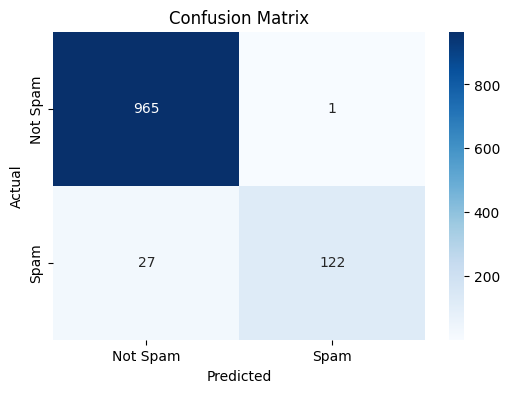

              precision    recall  f1-score      support
0              0.972782  0.998965  0.985700   966.000000
1              0.991870  0.818792  0.897059   149.000000
accuracy       0.974888  0.974888  0.974888     0.974888
macro avg      0.982326  0.908878  0.941379  1115.000000
weighted avg   0.975333  0.974888  0.973854  1115.000000


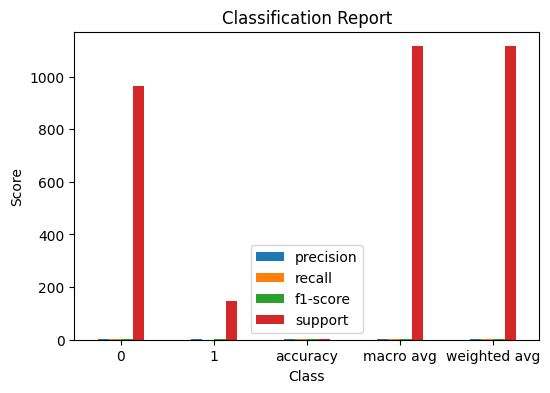

In [9]:

# Initialize the Naive Bayes model
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)


# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Classifier Accuracy: {accuracy:.2f}")

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report Visualization
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print (report_df)

# Plotting Precision, Recall, F1-Score for each class
report_df.plot(kind='bar', figsize=(6, 4))
plt.title('Classification Report')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()


Decision Tree Classifier Accuracy: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       966
           1       0.92      0.90      0.91       149

    accuracy                           0.98      1115
   macro avg       0.95      0.94      0.95      1115
weighted avg       0.98      0.98      0.98      1115



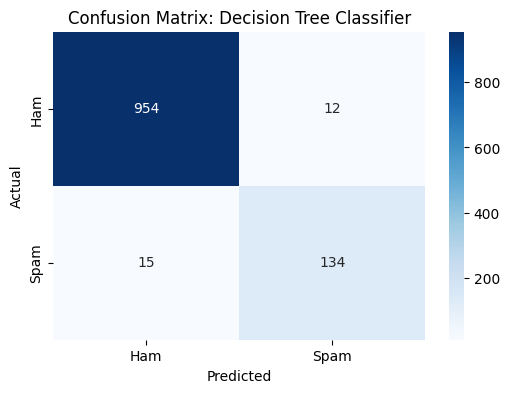

              precision    recall  f1-score      support
0              0.984520  0.987578  0.986047   966.000000
1              0.917808  0.899329  0.908475   149.000000
accuracy       0.975785  0.975785  0.975785     0.975785
macro avg      0.951164  0.943453  0.947261  1115.000000
weighted avg   0.975605  0.975785  0.975680  1115.000000


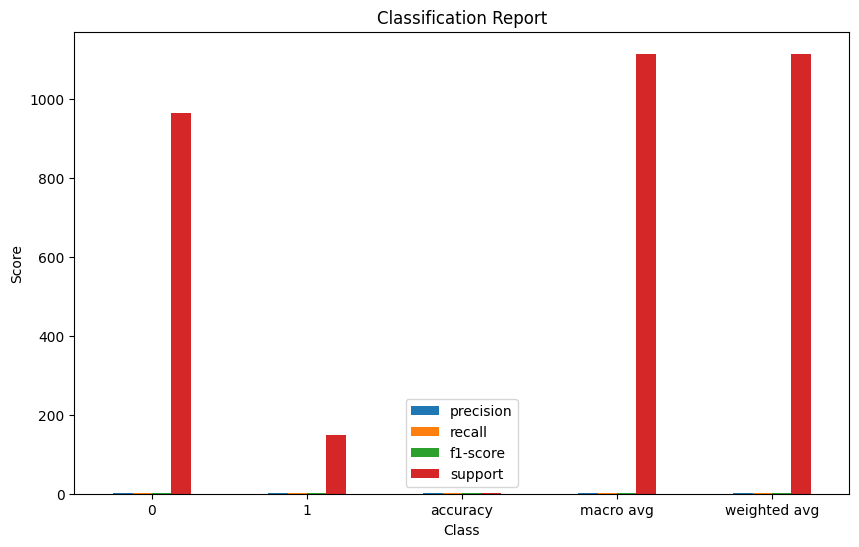

In [10]:
# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Classifier Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix: Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Classification Report Visualization
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print (report_df)

# Plotting Precision, Recall, F1-Score for each class
report_df.plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()

Support Vector Classifier Accuracy: 0.98


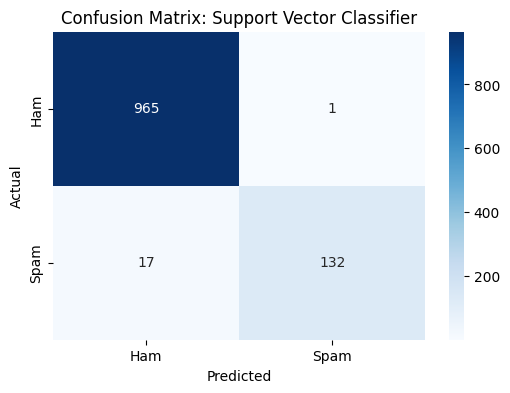

              precision    recall  f1-score      support
0              0.982688  0.998965  0.990760   966.000000
1              0.992481  0.885906  0.936170   149.000000
accuracy       0.983857  0.983857  0.983857     0.983857
macro avg      0.987585  0.942435  0.963465  1115.000000
weighted avg   0.983997  0.983857  0.983465  1115.000000


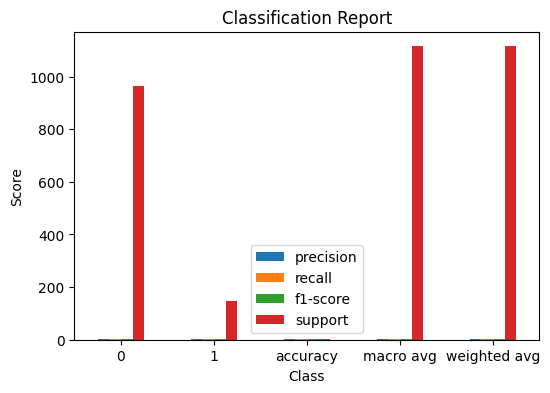

In [11]:
# Initialize the Support Vector Classifier
svc = SVC(kernel='linear', random_state=42)

# Train the model
svc.fit(X_train, y_train)

# Predict on the test set
y_pred = svc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Support Vector Classifier Accuracy: {accuracy:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix: Support Vector Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report Visualization
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print (report_df)

# Plotting Precision, Recall, F1-Score for each class
report_df.plot(kind='bar', figsize=(6, 4))
plt.title('Classification Report')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()

Logistic Regression Accuracy: 0.96


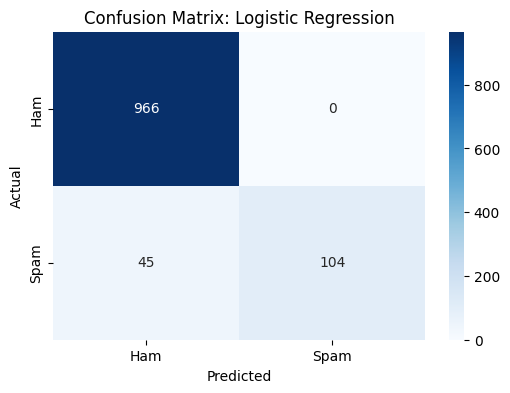

              precision    recall  f1-score      support
0              0.955490  1.000000  0.977238   966.000000
1              1.000000  0.697987  0.822134   149.000000
accuracy       0.959641  0.959641  0.959641     0.959641
macro avg      0.977745  0.848993  0.899686  1115.000000
weighted avg   0.961438  0.959641  0.956511  1115.000000


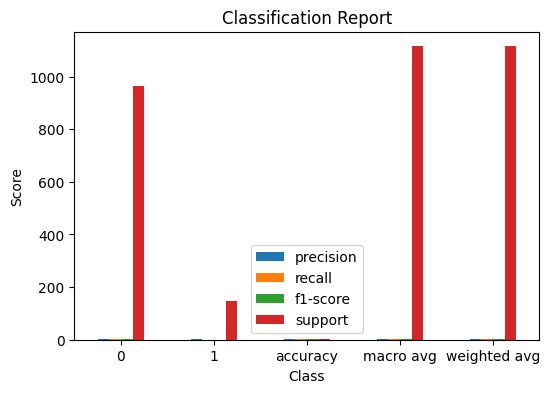

In [12]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")


# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report Visualization
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print (report_df)

# Plotting Precision, Recall, F1-Score for each class
report_df.plot(kind='bar', figsize=(6, 4))
plt.title('Classification Report')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()

K-Nearest Neighbors Accuracy: 0.92


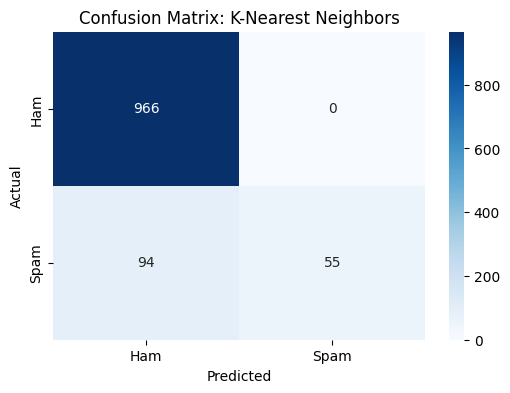

              precision    recall  f1-score      support
0              0.911321  1.000000  0.953603   966.000000
1              1.000000  0.369128  0.539216   149.000000
accuracy       0.915695  0.915695  0.915695     0.915695
macro avg      0.955660  0.684564  0.746409  1115.000000
weighted avg   0.923171  0.915695  0.898228  1115.000000


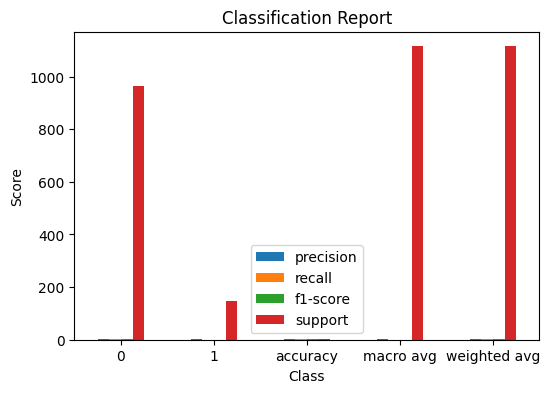

In [13]:
# Initialize the K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Default n_neighbors = 5

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"K-Nearest Neighbors Accuracy: {accuracy:.2f}")


# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix: K-Nearest Neighbors')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report Visualization
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print (report_df)

# Plotting Precision, Recall, F1-Score for each class
report_df.plot(kind='bar', figsize=(6, 4))
plt.title('Classification Report')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()

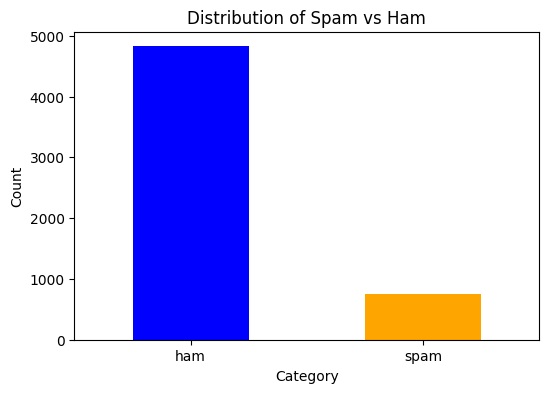

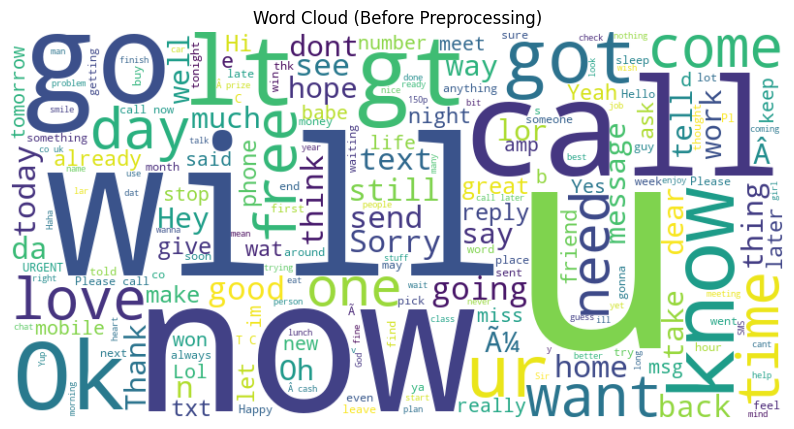

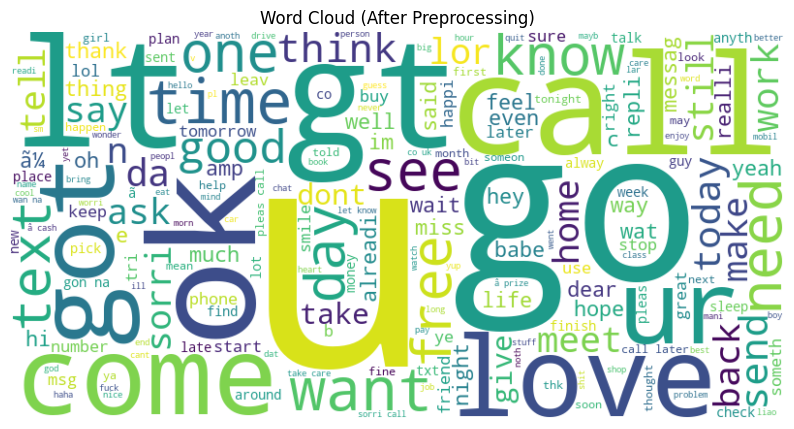

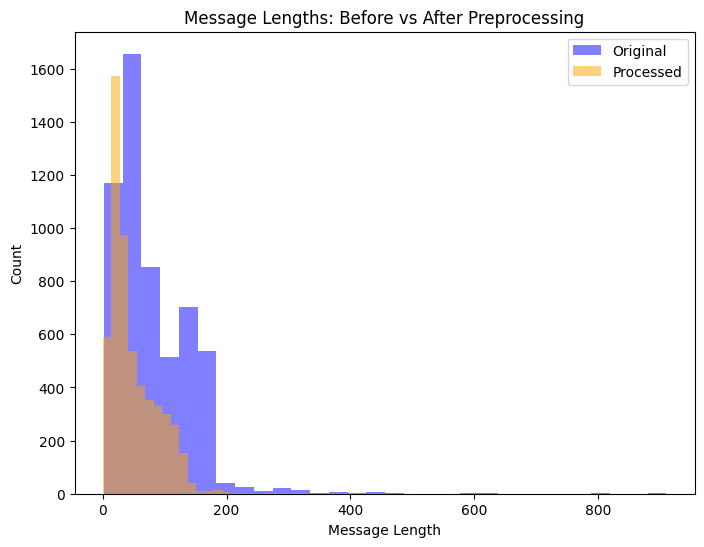

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

# Load the dataset
file_path = 'spam.csv'  # Update with your file path
data = pd.read_csv(file_path, encoding='latin1')

# Rename columns if necessary
data.columns = ['Category', 'Message']

# Initial Data Analysis
# 1. Distribution of spam vs ham
plt.figure(figsize=(6, 4))
data['Category'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title("Distribution of Spam vs Ham")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# 2. Word cloud for raw messages
raw_text = ' '.join(data['Message'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(raw_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud (Before Preprocessing)")
plt.show()

# Preprocess text
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove non-alphanumeric characters
    text = text.lower()  # Convert to lowercase
    text = word_tokenize(text)  # Tokenize
    text = [word for word in text if word not in stop_words]  # Remove stopwords
    text = [ps.stem(word) for word in text]  # Apply stemming
    return ' '.join(text)

data['processed_text'] = data['Message'].apply(preprocess_text)

# Word cloud for processed messages
processed_text = ' '.join(data['processed_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(processed_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud (After Preprocessing)")
plt.show()

# Compare message lengths before and after preprocessing
data['original_length'] = data['Message'].apply(len)
data['processed_length'] = data['processed_text'].apply(len)

plt.figure(figsize=(8, 6))
plt.hist(data['original_length'], bins=30, alpha=0.5, label='Original', color='blue')
plt.hist(data['processed_length'], bins=30, alpha=0.5, label='Processed', color='orange')
plt.legend(loc='upper right')
plt.title("Message Lengths: Before vs After Preprocessing")
plt.xlabel("Message Length")
plt.ylabel("Count")
plt.show()


In [15]:
# Train Naive Bayes
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)
nb_pred_proba = naive_bayes.predict_proba(X_test)[:, 1]  # Probability of spam

# Train Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
dt_pred_proba = decision_tree.predict_proba(X_test)[:, 1]  # Probability of spam

# Train Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)
lr_pred_proba = log_reg.predict_proba(X_test)[:, 1]  # Probability of spam

# Train SVC with probability enabled
svc = SVC(kernel='linear', probability=True, random_state=42)
svc.fit(X_train, y_train)
svc_pred_proba = svc.predict_proba(X_test)[:, 1]  # Probability of spam


In [16]:
import numpy as np

# Average the predictions
ensemble_pred_proba = (nb_pred_proba + dt_pred_proba + lr_pred_proba + svc_pred_proba) / 4
ensemble_pred = (ensemble_pred_proba > 0.5).astype(int)  # Convert to binary predictions


Ensemble Model Accuracy: 0.99


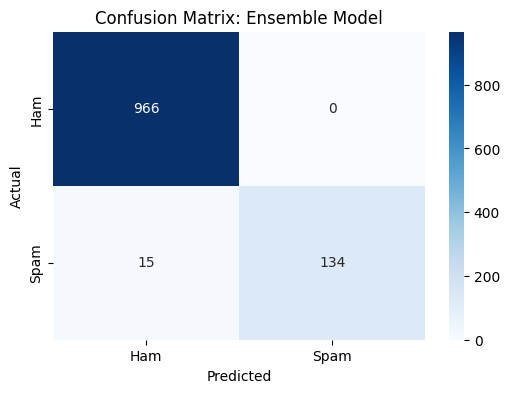

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.90      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate the ensemble model
accuracy_ensemble = accuracy_score(y_test, ensemble_pred)
print(f"Ensemble Model Accuracy: {accuracy_ensemble:.2f}")

# Confusion Matrix
conf_matrix_ensemble = confusion_matrix(y_test, ensemble_pred)

# Plot the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_ensemble, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix: Ensemble Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, ensemble_pred))


In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters
max_words = 5000  # Vocabulary size
max_len = 100     # Maximum sequence length

# Initialize the tokenizer
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['Message'])

# Convert text to sequences
X_seq = tokenizer.texts_to_sequences(data['Message'])

# Pad sequences to ensure uniform input size
X_padded = pad_sequences(X_seq, maxlen=max_len)

# Encode labels: Assuming 'Category' contains 'spam' and 'ham'
y = data['Category'].apply(lambda x: 1 if x == 'spam' else 0).values


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

def create_lstm_model():
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
    model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

lstm_model = create_lstm_model()


C:\Users\Mostafa Samir\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [22]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

def create_cnn_model():
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

cnn_model = create_cnn_model()


In [23]:
from tensorflow.keras.layers import Bidirectional

def create_bilstm_model():
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
    model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

bilstm_model = create_bilstm_model()


In [24]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Train each model
lstm_model.fit(X_train, y_train, batch_size=32, epochs=5, validation_split=0.1)
cnn_model.fit(X_train, y_train, batch_size=32, epochs=5, validation_split=0.1)
bilstm_model.fit(X_train, y_train, batch_size=32, epochs=5, validation_split=0.1)


Epoch 1/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 22s 129ms/step - accuracy: 0.8820 - loss: 0.3539 - val_accuracy: 0.9686 - val_loss: 0.0945
Epoch 2/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 15s 119ms/step - accuracy: 0.9856 - loss: 0.0599 - val_accuracy: 0.9798 - val_loss: 0.0793
Epoch 3/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 15s 120ms/step - accuracy: 0.9960 - loss: 0.0176 - val_accuracy: 0.9731 - val_loss: 0.0880
Epoch 4/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 16s 127ms/step - accuracy: 0.9964 - loss: 0.0124 - val_accuracy: 0.9776 - val_loss: 0.1011
Epoch 5/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 15s 122ms/step - accuracy: 0.9987 - loss: 0.0063 - val_accuracy: 0.9753 - val_loss: 0.1002
Epoch 1/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8573 - loss: 0.3438 - val_accuracy: 0.9686 - val_loss: 0.0917
Epoch 2/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9887 - loss: 0.0419 - val_accuracy: 0.9798 - val_loss: 0.0933
Epoch 3/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9955 - loss: 0.0151 - val_ac

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step
Ensemble Model Accuracy: 0.99


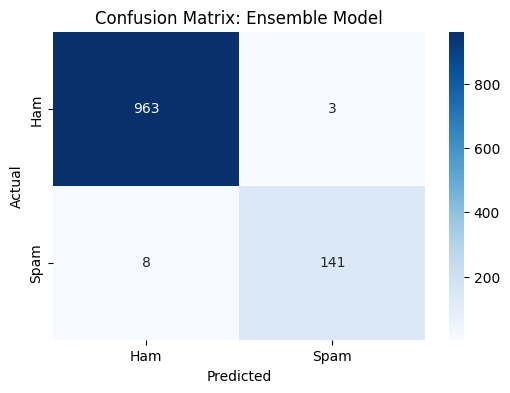

In [25]:
import numpy as np

# Get predictions from each model
lstm_pred = lstm_model.predict(X_test)
cnn_pred = cnn_model.predict(X_test)
bilstm_pred = bilstm_model.predict(X_test)

# Average the predictions
ensemble_pred = (lstm_pred + cnn_pred + bilstm_pred) / 3
ensemble_pred = (ensemble_pred > 0.5).astype(int)  # Threshold at 0.5

# Evaluate the ensemble model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_ensemble = accuracy_score(y_test, ensemble_pred)
print(f"Ensemble Model Accuracy: {accuracy_ensemble:.2f}")

conf_matrix_ensemble = confusion_matrix(y_test, ensemble_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_ensemble, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix: Ensemble Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [26]:
from sklearn.linear_model import LogisticRegression

# Collect predictions from each model as features
X_meta = np.hstack([lstm_pred, cnn_pred, bilstm_pred])

# Train a logistic regression as the meta-classifier
meta_clf = LogisticRegression()
meta_clf.fit(X_meta, y_test)

# Predict using the meta-classifier
ensemble_meta_pred = meta_clf.predict(X_meta)

# Evaluate the meta-classifier ensemble
accuracy_meta = accuracy_score(y_test, ensemble_meta_pred)
print(f"Classifier Ensemble Accuracy: {accuracy_meta:.2f}")


Classifier Ensemble Accuracy: 0.99
